In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
read_data=pd.read_csv(r'D:\Machine_Learning\scikit_learn\data\data\titanic_dataset.csv')

# Các đặc trưng của dataset Titanic
### PassengerId:
Chỉ mục duy nhất cho mỗi hành khách, không mang thông tin quan trọng trong việc phân loại hành khách sống hay chết trên tàu.
### Survived: target
Biến mục tiêu mà chúng ta muốn dự đoán, cho biết hành khách đã sống sót (1) hay không (0).
### Pclass:
Đánh giá địa vị xã hội và địa vị kinh tế của hành khách. Có thể quan trọng vì những hành khách ở tầng lớp cap có thể được ưu tiên cứu hộ.
### Name:
Tên của hành khách. Thông tin này không đóng vai trò quan trọng đến việc sống sót hay chết.
### Sex:
Giới tính của hành khách. Đây là một đặc trưng quan trọng để dự đoán khả năng sống sót, vì phụ nữ thường được ưu tiên khi cứu hộ.
### Age:
Tuổi của hành khách. Đặc trưng này có thể liên quan đến khả năng sống sót, vì trẻ em và người cao tuổi có thể được ưu tiên hơn trong quá trình cứu hộ.
### SibSp và Parch:
Số lượng anh chị em, vợ chồng, cha mẹ và con cái đi kèm trên tàu. Đặc trưng này có thể ảnh hưởng đến khả năng sống sót, vì có thể có sự hỗ trợ từ gia đình trong quá trình cứu hộ.
### Ticket:
Số vé của hành khách. Đặc trưng này có thể không mang thông tin quan trọng cho việc phân loại.
### Fare:
Giá vé. Không có mối liên hệ rõ ràng với khả năng sống sót
### Cabin:
Số cabin của hành khách. Có thể không ảnh hưởng quá nhiều đến kết quả phân loại vì có nhiều giá trị bị thiếu.
### Embarked:
Cảng lên tàu của hành khách. Đặc trưng này có thể không có tác động lớn đến khả năng sống sót.

In [3]:
read_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S


In [4]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [5]:
fare_mean=read_data.groupby('Age')['Fare'].mean()

In [6]:
#max of fare_mean 
fare_mean.max()

151.55

In [7]:
read_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Preprocessing

# Create new column

In [8]:
fill_age=read_data['Age'].mean()

In [9]:
read_data['Age']=read_data['Age'].fillna(fill_age)

In [10]:
def cal_age_range(r):
    if r['Age'] < 1:
        return 'Infants'
    elif r['Age'] < 10:
        return 'Children'
    elif r['Age'] < 18:
        return 'Teens'
    elif r['Age'] < 40:
        return 'Adults'
    elif r['Age'] < 60:
        return 'Middle Age'
    elif r['Age'] >=60:
        return 'Elders'
read_data['AgeRange']=read_data.apply(cal_age_range,axis=1)

In [11]:
read_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Adults
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Adults


In [12]:
# what was the survived rate of AgeRange
read_data.groupby('AgeRange')['Survived'].aggregate(['mean','count'])

,mean,count
AgeRange,,
Adults,0.357724,615
Children,0.563636,55
Elders,0.269231,26
Infants,1.000000,7
Middle Age,0.394161,137
Teens,0.450980,51


In [13]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  AgeRange     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Prename

In [14]:
def prefix_name(r):
    name=r['Name']
    pre_name=name.index(',')
    pre_name1=name.index('.')
    prefix=name[pre_name+1:pre_name1].strip() #strip is not getting space
    return prefix
read_data['prefix_name']=read_data.apply(prefix_name,axis=1)

In [15]:
read_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,prefix_name
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Adults,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Adults,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Adults,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Adults,Mr


# Gender dict

In [16]:
read_data['prefix_name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [17]:
gender_dict = {
    'female': ['Mrs', 'Miss', 'Mme', 'Ms', 'Lady', 'Mlle', 'the Countess'],
    'male': ['Mr', 'Master', 'Don', 'Rev', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer','Dr']
}

In [18]:
def add_gender(x):
    for gender, prefix_list in gender_dict.items():
        if x in prefix_list:
            return gender
    return None

read_data['new_sex'] =  read_data['prefix_name'].apply(add_gender)

In [19]:
read_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,prefix_name,new_sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Adults,Mr,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Adults,Mrs,female
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults,Miss,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Adults,Mrs,female
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Adults,Mr,male


In [20]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  AgeRange     891 non-null    object 
 12  prefix_name  891 non-null    object 
 13  new_sex      891 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [21]:
read_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,prefix_name,new_sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Adults,Mr,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Adults,Mrs,female
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults,Miss,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Adults,Mrs,female
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Adults,Mr,male


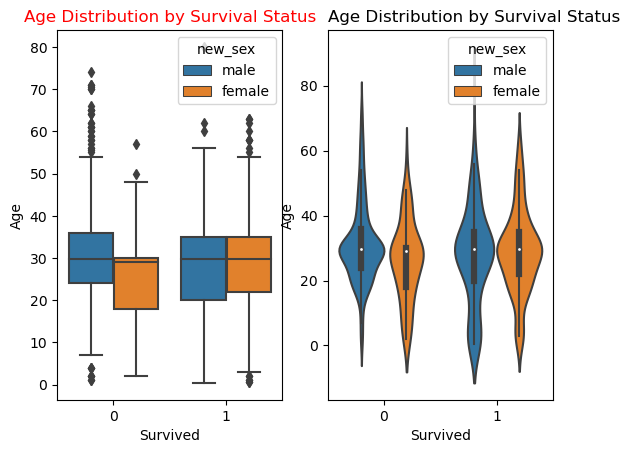

<Figure size 640x480 with 0 Axes>

In [22]:
# plot between age and survived
plt.subplot(121)
sns.boxplot(x='Survived', y='Age', data=read_data,hue='new_sex')
plt.title('Age Distribution by Survival Status',color='red')


# Violin plot
plt.subplot(122)
sns.violinplot(x='Survived', y='Age', data=read_data,hue='new_sex')
plt.title('Age Distribution by Survival Status',loc='left')
plt.show()
plt.tight_layout()


Text(0.5, 1.0, 'Distribution of Age reply on Pclass')

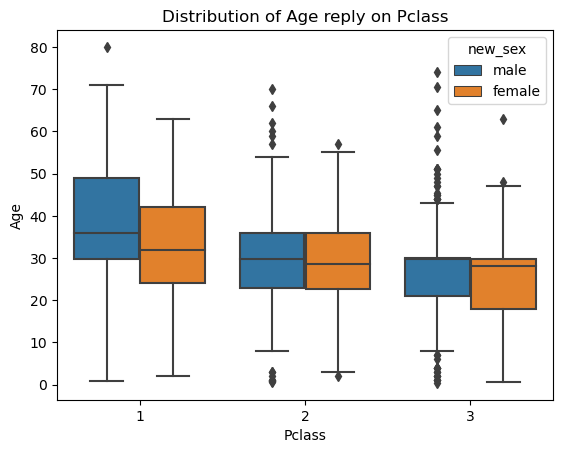

In [23]:
#Pclass with Age using boxplot
sns.boxplot(x='Pclass',y='Age',data=read_data,hue='new_sex')
plt.title('Distribution of Age reply on Pclass')

Text(0.5, 1.0, 'Distribution of sex spending for fare')

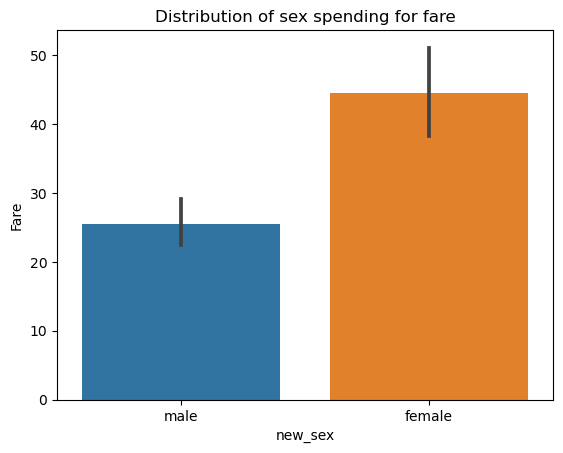

In [24]:
#barplot(sex and fare)
sns.barplot(x='new_sex',y='Fare',data=read_data)
plt.title('Distribution of sex spending for fare')

Text(0.5, 1.0, 'Distribution of Survived reply on fare')

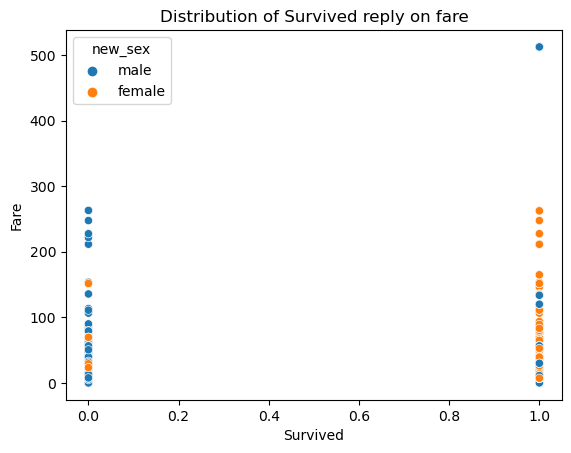

In [25]:
sns.scatterplot(x='Survived',y='Fare',data=read_data,hue='new_sex')
plt.title('Distribution of Survived reply on fare')

In [26]:
read_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,prefix_name,new_sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Adults,Mr,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Adults,Mrs,female
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults,Miss,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Adults,Mrs,female
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Adults,Mr,male


In [27]:
target=read_data['Survived']

In [28]:
read_data=read_data.drop('Survived',axis=1)

In [29]:
X=read_data

# Simple Imputer

### Fill_missing value

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
imp_fre=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X['Embarked']=imp_fre.fit_transform(X[['Embarked']])

In [32]:
unk_cabin=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X['Cabin']=unk_cabin.fit_transform(X[['Cabin']])

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked     891 non-null    object 
 10  AgeRange     891 non-null    object 
 11  prefix_name  891 non-null    object 
 12  new_sex      891 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 90.6+ KB


In [34]:
X.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,prefix_name,new_sex
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,S,Adults,Mr,male
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Adults,Mrs,female
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Adults,Miss,female
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Adults,Mrs,female
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,S,Adults,Mr,male


## Scaler with Minmaxscaler and LabelEncoder

In [35]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [36]:
categorical=read_data.select_dtypes(include='object').columns.to_list()
numerical=read_data.select_dtypes(include='int64').columns.to_list()

In [37]:
le=LabelEncoder()
for column in categorical:
    X[column]=le.fit_transform(X[column])

num_scaler=MinMaxScaler()
X[numerical]=num_scaler.fit_transform(X[numerical])

In [38]:
print(X.shape)

(891, 13)


# Train model

### Link view road to model that we need

https://stackoverflow.com/questions/2595176/which-machine-learning-classifier-to-choose-in-general

In [39]:
from sklearn.model_selection import train_test_split,cross_validate, KFold, cross_val_score #cross-validation 

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,target,test_size=0.2,random_state=42)

In [41]:
print(f"train: {X_train}")

train:      PassengerId  Pclass  Name        Age  SibSp     Parch  Ticket      Fare  \
331     0.371910     0.0   637  45.500000  0.000  0.000000      20   28.5000   
733     0.823596     0.5    84  23.000000  0.000  0.000000     228   13.0000   
382     0.429213     1.0   811  32.000000  0.000  0.000000     665    7.9250   
704     0.791011     1.0   326  26.000000  0.125  0.000000     398    7.8542   
813     0.913483     1.0    23   6.000000  0.500  0.333333     333   31.2750   
..           ...     ...   ...        ...    ...       ...     ...       ...   
106     0.119101     1.0   724  21.000000  0.000  0.000000     296    7.6500   
270     0.303371     0.0   125  29.699118  0.000  0.000000      47   31.0000   
860     0.966292     1.0   325  41.000000  0.250  0.000000     399   14.1083   
435     0.488764     0.0   143  14.000000  0.125  0.333333      33  120.0000   
102     0.114607     0.0   858  21.000000  0.000  0.166667     417   77.2875   

     Cabin  Embarked  AgeRange  

# LinearSVC model and Valuation model

In [42]:
from sklearn.svm import LinearSVC

In [43]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,make_scorer

c:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

     index  actual  predict_test
0      709       1             1
1      439       0             1
2      840       0             1
3      720       1             1
4       39       1             1
..     ...     ...           ...
174    433       0             1
175    773       0             1
176     25       1             1
177     84       1             1
178     10       1             1

[179 rows x 3 columns]
accuracy_score: 0.4134078212290503,precision: 0.4134078212290503


c:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


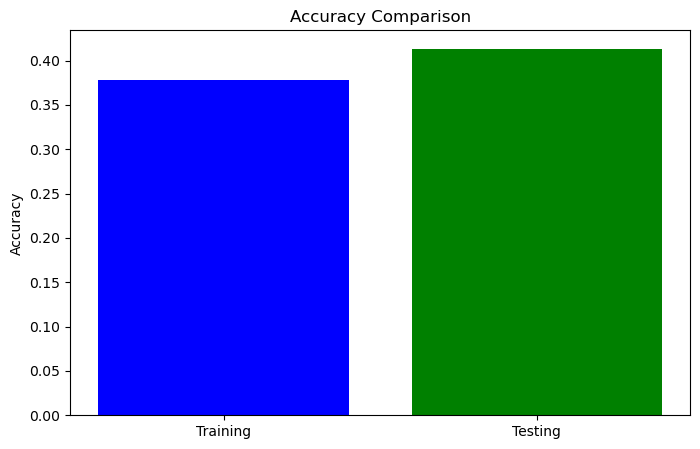

The model seems to be generalizing well.


In [44]:
# define C to evaluate
C=np.logspace(-5, 5, 100)

train_scores = []
test_scores = []
for alpha in C:
    model = LinearSVC(C=alpha,loss='squared_hinge',dual=True,tol=0.0001,multi_class='ovr',max_iter=1000,penalty='l2',random_state=42).fit(X_train, y_train)
    train_scores.append(1 - model.score(X_train, y_train))
    test_scores.append(1 - model.score(X_test, y_test))
    predict_test_LinearSVC=model.predict(X_test)
    predict_train_LinearSVC=model.predict(X_train)
predict_df=pd.DataFrame({"actual":y_test,
                          "predict_test":predict_test_LinearSVC})

print(predict_df.reset_index())
   
# print(predict_test_LinearSVC[:10])
# print(y_test[:10])
score=accuracy_score(y_test,predict_test_LinearSVC)
precision=precision_score(y_test,predict_test_LinearSVC)
print(f"accuracy_score: {score},precision: {precision}")

accuracy_train = accuracy_score(y_train, predict_train_LinearSVC)


# Visualize the results (optional)
plt.figure(figsize=(8, 5))
plt.bar(['Training', 'Testing'], [accuracy_train, score], color=['blue', 'green'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


# Check for overfitting
if accuracy_train > score:
    print("The model may be overfitting.")
else:
    print("The model seems to be generalizing well.")
    

# Linear Support Vector Classification.
Distract outlier, Effective in High-Dimensional Spaces, Versatile Kernels: SVMs can use different kernel functions (linear, polynomial, radial basis function (RBF), etc.),allowing them to capture complex relationships in the data, Effective with Small Datasets:
SVMs can be effective even when the dataset is relatively small

In [45]:
from sklearn.svm import SVC

In [46]:
#fit X_train,y_train
SVC_model_train=SVC(C=1.0,kernel='rbf',gamma='scale',random_state=42)
SVC_model_train.fit(X_train,y_train)

SVC(random_state=42)

In [47]:
predict_test=SVC_model_train.predict(X_test)
print(f'y_train: {y_test.to_numpy()}\n predict_test: {predict_test}')

y_train: [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]
 predict_test: [0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]


# Valuation model

In [48]:
SVC_test_accuracy=accuracy_score(y_test,predict_test)
SVC_test_precision=precision_score(y_test,predict_test)
print(f"accuracy: {SVC_test_accuracy}, precision: {SVC_test_precision}")

accuracy: 0.6759776536312849, precision: 0.7857142857142857


The main differences between LinearSVC and SVC lie in the loss function used by default, and in the handling of intercept regularization between those two implementations.

# Avoid overfitting

### Cross-Validation

c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning

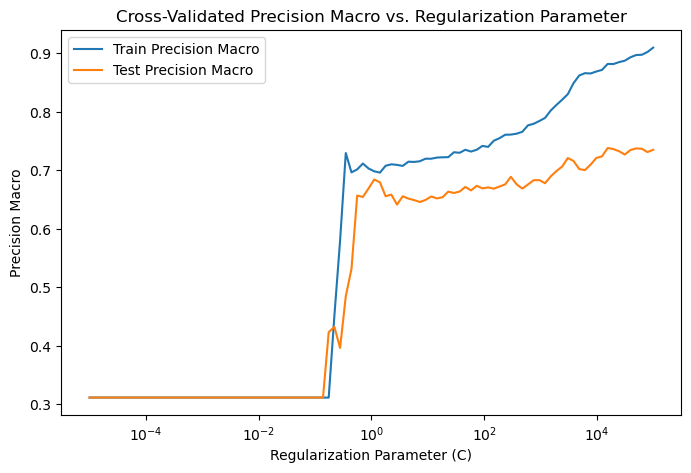

0.74 accuracy with a standard deviation of 0.01


In [49]:
# define C to evaluate
C=np.logspace(-5, 5, 100)

train_prec_macro_list = []
test_prec_macro_list = []
for alpha in C:
    model =SVC(C=alpha,kernel='rbf',degree=3,gamma='scale',coef0=0.0,probability=False,shrinking=True,random_state=42).fit(X_train, y_train)
        
    scoring = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}
    scores = cross_validate(model, X_train, y_train, scoring=scoring,cv=3, return_train_score=True)

    # scores['train_prec_macro']

   # Use cross-validated scores for assessment
    train_prec_macro_list.append(scores['train_prec_macro'].mean())
    test_prec_macro_list.append(scores['test_prec_macro'].mean())
# Visualize the results
plt.figure(figsize=(8, 5))
plt.plot(C, train_prec_macro_list, label='Train Precision Macro')
plt.plot(C, test_prec_macro_list, label='Test Precision Macro')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Precision Macro')
plt.legend()
plt.title('Cross-Validated Precision Macro vs. Regularization Parameter')
plt.show()
# print(sorted(scores.keys()))

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores['test_prec_macro'].mean(), scores['test_prec_macro'].std()))

# # Check for overfitting
# if train_prec_macro_list > test_prec_macro_list:
#     print("The model may be overfitting.")
# else:
#     print("The model seems to be generalizing well.")

# score=accuracy_score(y_test,predict_test_LinearSVC)
# precision=precision_score(y_test,predict_test_LinearSVC)
# print(f"accuracy_score: {score},precision: {precision}")





# Applying new data

In [50]:
X_new=X

In [51]:
def Farerange(x):
    if x['Fare']>=512:
        return 'Diamond'
    elif x['Fare']>=200 and x['Fare']<512:
        return 'Gold'
    elif x['Fare']>=100 and x['Fare']<200:
        return 'Silver'
    elif x['Fare']>=32 and x['Fare']<100:
        return 'Bronze'
    else:
        return 'Down Bronze'
X_new['FareRange']=X_new.apply(Farerange,axis=1)

In [52]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Pclass       891 non-null    float64
 2   Name         891 non-null    int32  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Ticket       891 non-null    int32  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    int32  
 9   Embarked     891 non-null    int32  
 10  AgeRange     891 non-null    int32  
 11  prefix_name  891 non-null    int32  
 12  new_sex      891 non-null    int32  
 13  FareRange    891 non-null    object 
dtypes: float64(6), int32(7), object(1)
memory usage: 73.2+ KB


# Scaler

In [53]:
categorical_new=X_new.select_dtypes(include='object').columns.to_list()
numerical_new=X_new.select_dtypes(include='int64').columns.to_list()
print(f"categorical: {categorical_new}, numerical: {numerical_new}")

categorical: ['FareRange'], numerical: []


In [54]:
le_new=LabelEncoder()
for column in categorical_new:
    X[column]=le.fit_transform(X[column])

num_scaler=MinMaxScaler()
X[numerical]=num_scaler.fit_transform(X[numerical])

In [55]:
print(X.shape)

(891, 14)


# Train data

In [56]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X,target,test_size=0.2,random_state=42)

c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning

c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning

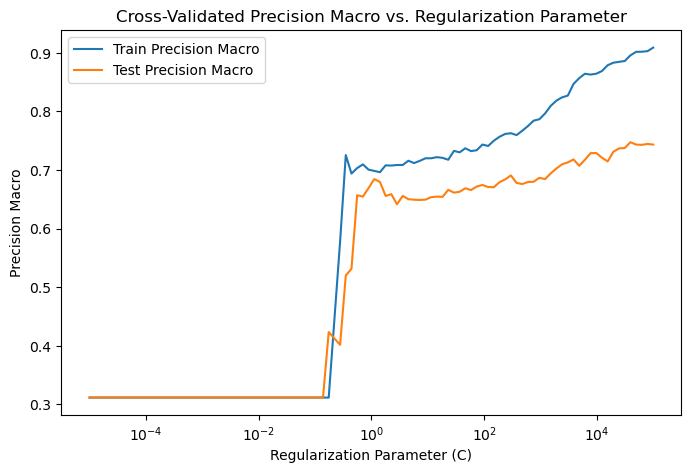

0.74 accuracy with a standard deviation of 0.02


In [57]:
# define C to evaluate
C=np.logspace(-5, 5, 100)

train_prec_macro_list_new = []
test_prec_macro_list_new = []
for alpha_new in C:
    model_new = SVC(C=alpha_new,kernel='rbf',degree=3,gamma='scale',coef0=0.0,probability=False,shrinking=True,random_state=42).fit(X_train_new, y_train_new)
    # train_scores.append(1 - model.score(X_train, y_train))
    # test_scores.append(1 - model.score(X_test, y_test))
        
    scoring_new = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}
    scores_new = cross_validate(model_new, X_train_new, y_train_new, scoring=scoring_new,cv=3, return_train_score=True)

    # scores['train_prec_macro']

   # Use cross-validated scores for assessment
    train_prec_macro_list_new.append(scores_new['train_prec_macro'].mean())
    test_prec_macro_list_new.append(scores_new['test_prec_macro'].mean())
# Visualize the results
plt.figure(figsize=(8, 5))
plt.plot(C, train_prec_macro_list_new, label='Train Precision Macro')
plt.plot(C, test_prec_macro_list_new, label='Test Precision Macro')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Precision Macro')
plt.legend()
plt.title('Cross-Validated Precision Macro vs. Regularization Parameter')
plt.show()
# print(sorted(scores.keys()))

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_new['test_prec_macro'].mean(), scores_new['test_prec_macro'].std()))

# # Check for overfitting
# if train_prec_macro_list > test_prec_macro_list:
#     print("The model may be overfitting.")
# else:
#     print("The model seems to be generalizing well.")

# score=accuracy_score(y_test,predict_test_LinearSVC)
# precision=precision_score(y_test,predict_test_LinearSVC)
# print(f"accuracy_score: {score},precision: {precision}")





# Change model

# Randomforest and avoid Overfitting

In [58]:
from sklearn.ensemble import RandomForestClassifier

c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


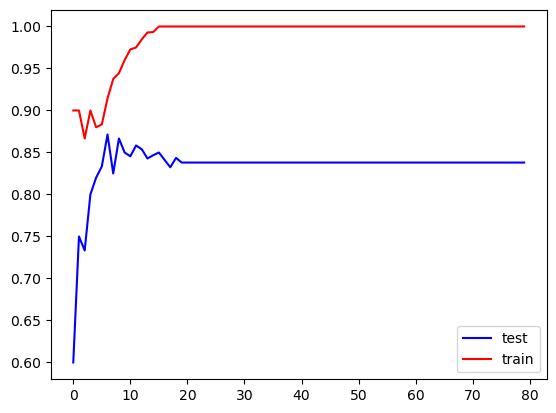

In [59]:
rdf_score=[]
rdf_train_score=[]
for i in range(1,81): #891 rows but we get 810 rows
    rdf=RandomForestClassifier(max_depth=i,criterion='gini',min_samples_split=2,bootstrap=True,max_features='auto',
                           min_impurity_decrease=0.0,min_samples_leaf=1,
                           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False).fit(X_train, y_train)
    
    Y_pred_rdf = rdf.predict(X_test[:i*10])
    accuracy_rdf=accuracy_score(y_test[:i*10],Y_pred_rdf)
    precision_rdf=precision_score(y_test[:i*10],Y_pred_rdf)
    Y_pred_rdf_train = rdf.predict(X_train[:i*10])
    accuracy_train_rdf=accuracy_score(y_train[:i*10],Y_pred_rdf_train)
    precision_train_rdf=precision_score(y_train[:i*10],Y_pred_rdf_train)
    rdf_score.append(accuracy_rdf.mean())
    rdf_train_score.append(accuracy_train_rdf.mean())

plt.plot(np.arange(i),rdf_score,label='test',color='blue')
plt.plot(np.arange(i),rdf_train_score,label='train',color='red')
plt.legend()

# Cross-validation

In [60]:
rdf=RandomForestClassifier(max_depth=70,criterion='gini',min_samples_split=10,bootstrap=True,max_features='auto',
                           min_impurity_decrease=0.0,min_samples_leaf=4,
                           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False,ccp_alpha=0.0,max_samples=None).fit(X_train, y_train)
    

kfold=KFold(n_splits=5,shuffle=True,random_state=42)
score_rdf=cross_val_score(rdf,X_train,y_train,cv=kfold)
print('average accuracy: %.2f%%'%(score_rdf.mean()))
print('standard deviation: %.2f%%'%(score_rdf.std()))

average accuracy: 0.82%
standard deviation: 0.03%


In [61]:
train_prec_macro_list_rdf = []
test_prec_macro_list_rdf = []
scoring_rdf = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}
scores_rdf = cross_validate(rdf, X_train, y_train, scoring=scoring_rdf,cv=4, return_train_score=True)

In [62]:
train=round(scores_rdf['train_prec_macro'].mean(),2)
test=round(scores_rdf['test_prec_macro'].mean(),2)

In [63]:
train_prec_macro_list_rdf.append(train)
test_prec_macro_list_rdf.append(test)

In [64]:
print(f"accuracy:{train_prec_macro_list_rdf}")
print(f"accuracy:{test_prec_macro_list_rdf}")

accuracy:[0.92]
accuracy:[0.83]


# Feature scores

In [65]:
feature_list=[]
feature_score=rdf.feature_importances_ #get feature score
print("Feature : Score")
for feature,score in zip(X_train.columns,feature_score):
    print(f"{feature}: {score}")
    if score>=0.06:
        feature_list.append(feature)
        print(feature_list)


Feature : Score
PassengerId: 0.05678503287289131
Pclass: 0.0753066131662867
['Pclass']
Name: 0.06640802978182929
['Pclass', 'Name']
Age: 0.06415209594645374
['Pclass', 'Name', 'Age']
SibSp: 0.03049697243783025
Parch: 0.02046670280642273
Ticket: 0.10540534320551187
['Pclass', 'Name', 'Age', 'Ticket']
Fare: 0.10338556505617606
['Pclass', 'Name', 'Age', 'Ticket', 'Fare']
Cabin: 0.041936219262221054
Embarked: 0.01845002466839868
AgeRange: 0.011361190091138238
prefix_name: 0.14644982608301468
['Pclass', 'Name', 'Age', 'Ticket', 'Fare', 'prefix_name']
new_sex: 0.25939638462182557
['Pclass', 'Name', 'Age', 'Ticket', 'Fare', 'prefix_name', 'new_sex']


# Feature selection

In [66]:
print(feature_list)

['Pclass', 'Name', 'Age', 'Ticket', 'Fare', 'prefix_name', 'new_sex']


In [77]:
extracted_features=feature_list

In [78]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Train

In [79]:
se_X_train,se_X_test,se_y_train,se_y_test=train_test_split(X[extracted_features],target,test_size=0.2,random_state=42)

In [80]:
se_X_test.head()

,Pclass,Name,Age,Ticket,Fare,prefix_name,new_sex
709,1.0,561,29.699118,189,15.2458,7,1
439,0.5,447,31.000000,547,10.5000,11,1
840,1.0,11,20.000000,647,7.9250,11,1
720,0.5,331,6.000000,155,33.0000,8,0
39,1.0,589,14.000000,186,11.2417,8,0


# Cross validation

In [81]:
se_rdf=RandomForestClassifier(max_depth=None,criterion='gini',min_samples_split=10,bootstrap=True,max_features='auto',
                           min_impurity_decrease=0.0,min_samples_leaf=4,
                           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False,ccp_alpha=0.0,max_samples=None).fit(se_X_train, se_y_train)
    

kfold=KFold(n_splits=5,shuffle=True,random_state=42)
score_rdf=cross_val_score(se_rdf,se_X_train,se_y_train,cv=kfold)
print('average accuracy: %.2f%%'%(score_rdf.mean()))
print('standard deviation: %.2f%%'%(score_rdf.std()))

average accuracy: 0.82%
standard deviation: 0.03%


In [82]:
se_train_prec_macro_list_rdf = []
se_test_prec_macro_list_rdf = []
scoring_rdf = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}
scores_rdf = cross_validate(se_rdf, se_X_train, se_y_train, scoring=scoring_rdf,cv=3, return_train_score=True)

In [83]:
sorted(scores_rdf.keys())

['fit_time',
 'score_time',
 'test_prec_macro',
 'test_rec_macro',
 'train_prec_macro',
 'train_rec_macro']

In [84]:
se_accuracy_train=round(scores_rdf['train_prec_macro'].mean(),2)
se_accuracy_test=round(scores_rdf['test_prec_macro'].mean(),2)

In [85]:
se_train_prec_macro_list_rdf.append(se_accuracy_train)
se_test_prec_macro_list_rdf.append(se_accuracy_test)

In [86]:
print(f"accuracy_train:{se_train_prec_macro_list_rdf}")
print(f"accuracy_test:{se_test_prec_macro_list_rdf}")

accuracy_train:[0.91]
accuracy_test:[0.83]
